<a href="https://colab.research.google.com/github/aswaroop99/Wakefield/blob/main/wakefieldVectorized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

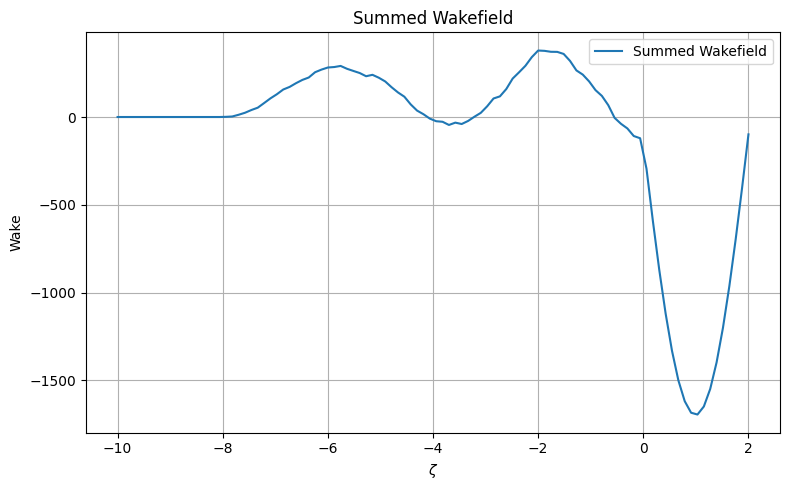

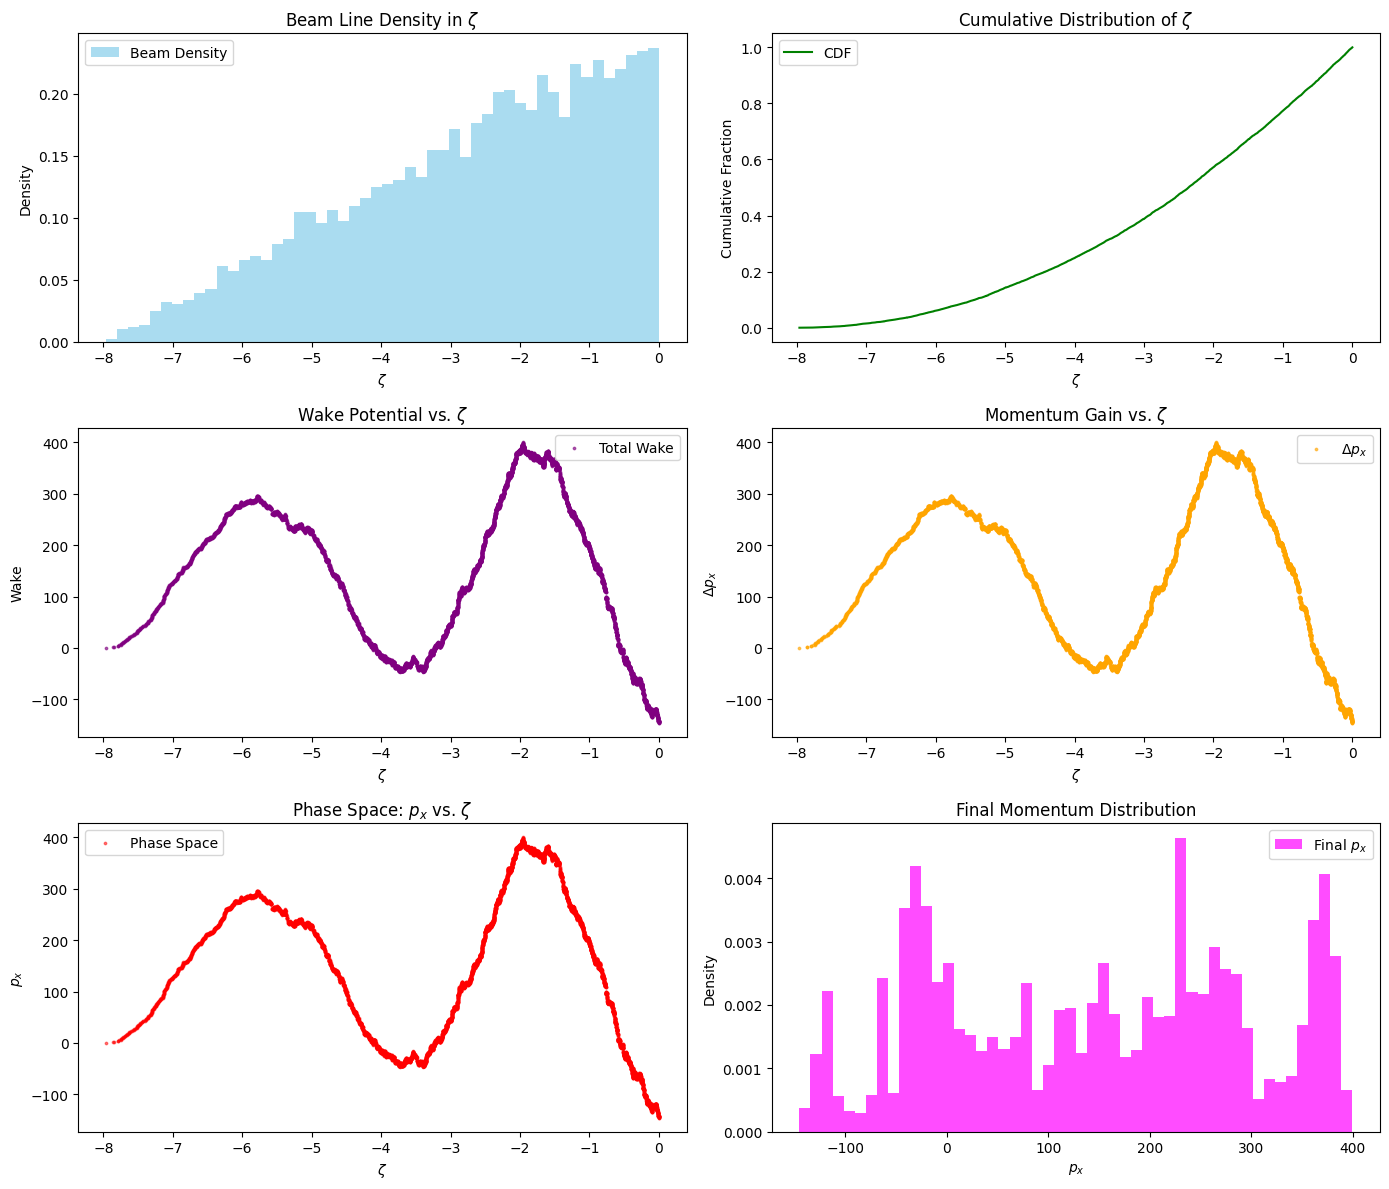

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# PARAMETERS
num_particles = 10000
zeta_min, zeta_max = -8.0, 0.0
W0 = 1.0
k_wake = 1.5  # wake oscillation parameter
charge = 1.0
px_initial = 0.0


def sample_ramp_zeta(n, z_min, z_max, device):
    u = torch.rand(n, device=device)
    return z_min + (z_max - z_min) * torch.sqrt(u)


def wake_function(delta_zeta):
    wake_pos = W0 * torch.cos(k_wake * delta_zeta)
    wake_zero = torch.full_like(delta_zeta, W0 / 2)
    wake_neg = torch.zeros_like(delta_zeta)
    return torch.where(delta_zeta > 0, wake_pos,
                       torch.where(delta_zeta == 0, wake_zero, wake_neg))

#wake per particle
def compute_total_wake(zeta):
    # zeta: [N]
    delta = zeta.unsqueeze(1) - zeta.unsqueeze(0)  # [N, N]
    wake_vals = wake_function(delta)
    return wake_vals.sum(dim=1)


if __name__ == '__main__':
    #initialize particles
    zeta = sample_ramp_zeta(num_particles, zeta_min, zeta_max, device)
    px0 = torch.full((num_particles,), px_initial, device=device)

    #compute
    total_wake = compute_total_wake(zeta)
    px = px0 + charge * total_wake
    delta_px = px - px0

    zeta_eval = torch.linspace(zeta_min - 2, zeta_max + 2, steps=100, device=device)
    delta_eval = zeta_eval.unsqueeze(-1) - zeta.unsqueeze(-2)
    summed_wake = wake_function(delta_eval).sum(dim=-1)

    zeta_np = zeta.cpu().numpy()
    total_wake_np = total_wake.cpu().numpy()
    delta_px_np = delta_px.cpu().numpy()
    px_np = px.cpu().numpy()
    zeta_eval_np = zeta_eval.cpu().numpy()
    summed_wake_np = summed_wake.cpu().numpy()

    #sum wakefield
    plt.figure(figsize=(8, 5))
    plt.plot(zeta_eval_np, summed_wake_np, label='Summed Wakefield')
    plt.title('Summed Wakefield')
    plt.xlabel(r'$\zeta$')
    plt.ylabel('Wake')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(3, 2, figsize=(14, 12))

    axs[0, 0].hist(zeta_np, bins=50, density=True, alpha=0.7, color='skyblue', label='Beam Density')
    axs[0, 0].set(
        title='Beam Line Density in $\zeta$',
        xlabel=r'$\zeta$',
        ylabel='Density'
    )
    axs[0, 0].legend()

    axs[0, 1].plot(
        np.sort(zeta_np),
        np.linspace(0, 1, num_particles),
        color='green',
        label='CDF'
    )
    axs[0, 1].set(
        title='Cumulative Distribution of $\zeta$',
        xlabel=r'$\zeta$',
        ylabel='Cumulative Fraction'
    )
    axs[0, 1].legend()
    axs[1, 0].scatter(zeta_np, total_wake_np, s=3, alpha=0.6, color='purple', label='Total Wake')
    axs[1, 0].set(
        title='Wake Potential vs. $\zeta$',
        xlabel=r'$\zeta$',
        ylabel='Wake'
    )
    axs[1, 0].legend()

    axs[1, 1].scatter(zeta_np, delta_px_np, s=3, alpha=0.6, color='orange', label=r'$\Delta p_x$')
    axs[1, 1].set(
        title='Momentum Gain vs. $\zeta$',
        xlabel=r'$\zeta$',
        ylabel=r'$\Delta p_x$'
    )
    axs[1, 1].legend()

    axs[2, 0].scatter(zeta_np, px_np, s=3, alpha=0.5, color='red', label='Phase Space')
    axs[2, 0].set(
        title='Phase Space: $p_x$ vs. $\zeta$',
        xlabel=r'$\zeta$',
        ylabel=r'$p_x$'
    )
    axs[2, 0].legend()

    axs[2, 1].hist(px_np, bins=50, density=True, alpha=0.7, color='magenta', label='Final $p_x$')
    axs[2, 1].set(
        title='Final Momentum Distribution',
        xlabel=r'$p_x$',
        ylabel='Density'
    )
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()


new version

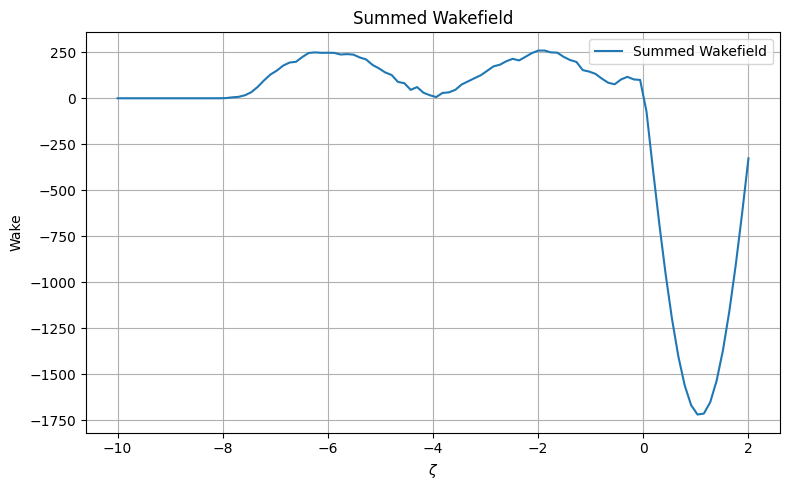

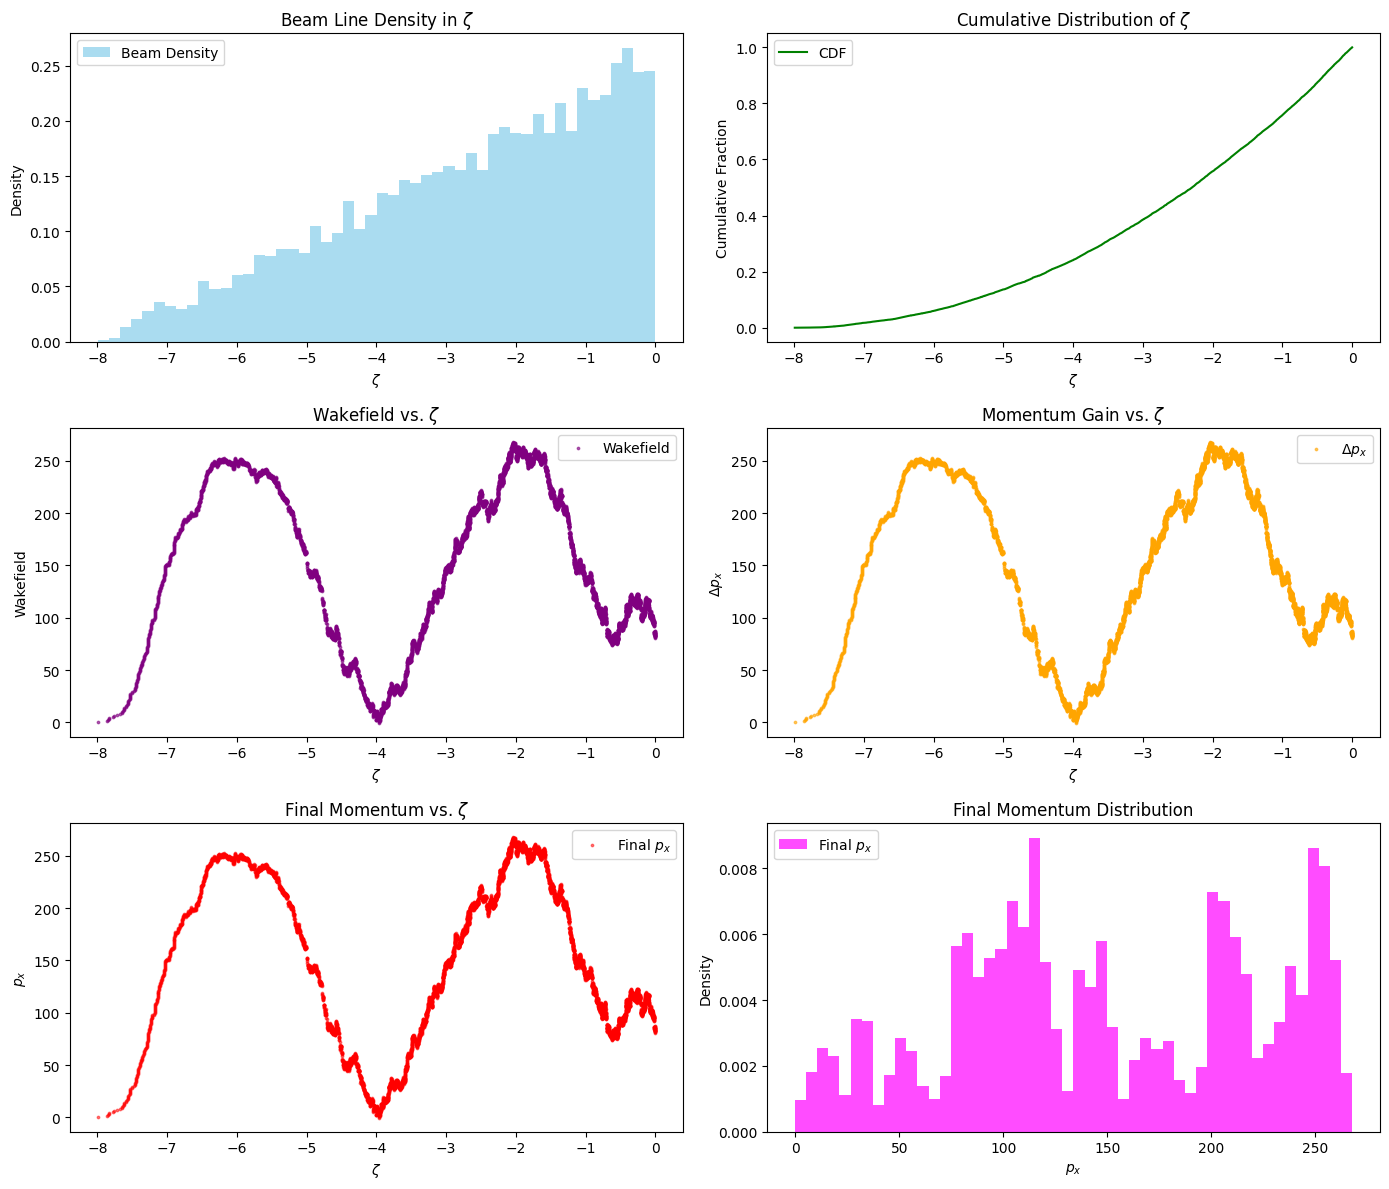

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt


device = 'cuda' if torch.cuda.is_available() else 'cpu'

# PARAMETERS
num_particles = 10000
zeta_min, zeta_max = -8.0, 0.0
W0 = 1.0
k_wake = 1.5  # wake oscillation parameter
charge = 1.0
px_initial = 0.0

def sample_ramp_zeta(n, z_min, z_max, device):
    u = torch.rand(n, device=device)
    return z_min + (z_max - z_min) * torch.sqrt(u)


def wake_function(delta_zeta):
    wake_pos = W0 * torch.cos(k_wake * delta_zeta)
    wake_zero = torch.full_like(delta_zeta, W0 / 2)
    wake_neg = torch.zeros_like(delta_zeta)
    return torch.where(delta_zeta > 0, wake_pos,
                       torch.where(delta_zeta == 0, wake_zero, wake_neg))


def compute_total_wake(zeta):
    delta = zeta.unsqueeze(1) - zeta.unsqueeze(0)  # [N, N]
    wake_vals = wake_function(delta)
    return wake_vals.sum(dim=1)

if __name__ == '__main__':
    zeta = sample_ramp_zeta(num_particles, zeta_min, zeta_max, device)
    px0 = torch.full((num_particles,), px_initial, device=device)

    total_wake = compute_total_wake(zeta)
    px = px0 + charge * total_wake
    delta_px = px - px0

    zeta_eval = torch.linspace(zeta_min - 2, zeta_max + 2, steps=100, device=device)
    delta_eval = zeta_eval.unsqueeze(-1) - zeta.unsqueeze(-2)  # [100, N]
    summed_wake = wake_function(delta_eval).sum(dim=-1)

    zeta_np = zeta.cpu().numpy()
    total_wake_np = total_wake.cpu().numpy()
    delta_px_np = delta_px.cpu().numpy()
    px_np = px.cpu().numpy()
    zeta_eval_np = zeta_eval.cpu().numpy()
    summed_wake_np = summed_wake.cpu().numpy()

    plt.figure(figsize=(8, 5))
    plt.plot(zeta_eval_np, summed_wake_np, label='Summed Wakefield')
    plt.title('Summed Wakefield')
    plt.xlabel(r'$\zeta$')
    plt.ylabel('Wake')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(3, 2, figsize=(14, 12))

    axs[0, 0].hist(zeta_np, bins=50, density=True, alpha=0.7,
                   color='skyblue', label='Beam Density')
    axs[0, 0].set_title(r'Beam Line Density in $\zeta$')
    axs[0, 0].set_xlabel(r'$\zeta$')
    axs[0, 0].set_ylabel('Density')
    axs[0, 0].legend()

    axs[0, 1].plot(np.sort(zeta_np), np.linspace(0, 1, num_particles),
                   color='green', label='CDF')
    axs[0, 1].set_title(r'Cumulative Distribution of $\zeta$')
    axs[0, 1].set_xlabel(r'$\zeta$')
    axs[0, 1].set_ylabel('Cumulative Fraction')
    axs[0, 1].legend()

    axs[1, 0].scatter(zeta_np, total_wake_np, s=3, alpha=0.6,
                      color='purple', label='Wakefield')
    axs[1, 0].set_title(r'Wakefield vs. $\zeta$')
    axs[1, 0].set_xlabel(r'$\zeta$')
    axs[1, 0].set_ylabel('Wakefield')
    axs[1, 0].legend()

    axs[1, 1].scatter(zeta_np, delta_px_np, s=3, alpha=0.6,
                      color='orange', label=r'$\Delta p_x$')
    axs[1, 1].set_title(r'Momentum Gain vs. $\zeta$')
    axs[1, 1].set_xlabel(r'$\zeta$')
    axs[1, 1].set_ylabel(r'$\Delta p_x$')
    axs[1, 1].legend()

    axs[2, 0].scatter(zeta_np, px_np, s=3, alpha=0.5,
                      color='red', label='Final $p_x$')
    axs[2, 0].set_title(r'Final Momentum vs. $\zeta$')
    axs[2, 0].set_xlabel(r'$\zeta$')
    axs[2, 0].set_ylabel(r'$p_x$')
    axs[2, 0].legend()

    axs[2, 1].hist(px_np, bins=50, density=True, alpha=0.7,
                   color='magenta', label='Final $p_x$')
    axs[2, 1].set_title('Final Momentum Distribution')
    axs[2, 1].set_xlabel(r'$p_x$')
    axs[2, 1].set_ylabel('Density')
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()

In [3]:
!pip uninstall torch -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torch 2.6.0+cu118
Uninstalling torch-2.6.0+cu118:
  Successfully uninstalled torch-2.6.0+cu118
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached https://download.pytorch.org/whl/triton-3.3.1-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (1.5 kB)
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl.metadata (27 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl (848.7 MB)


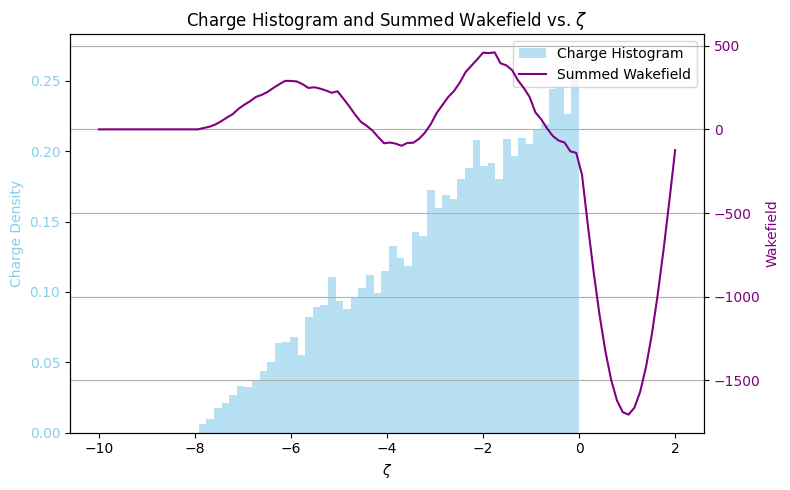

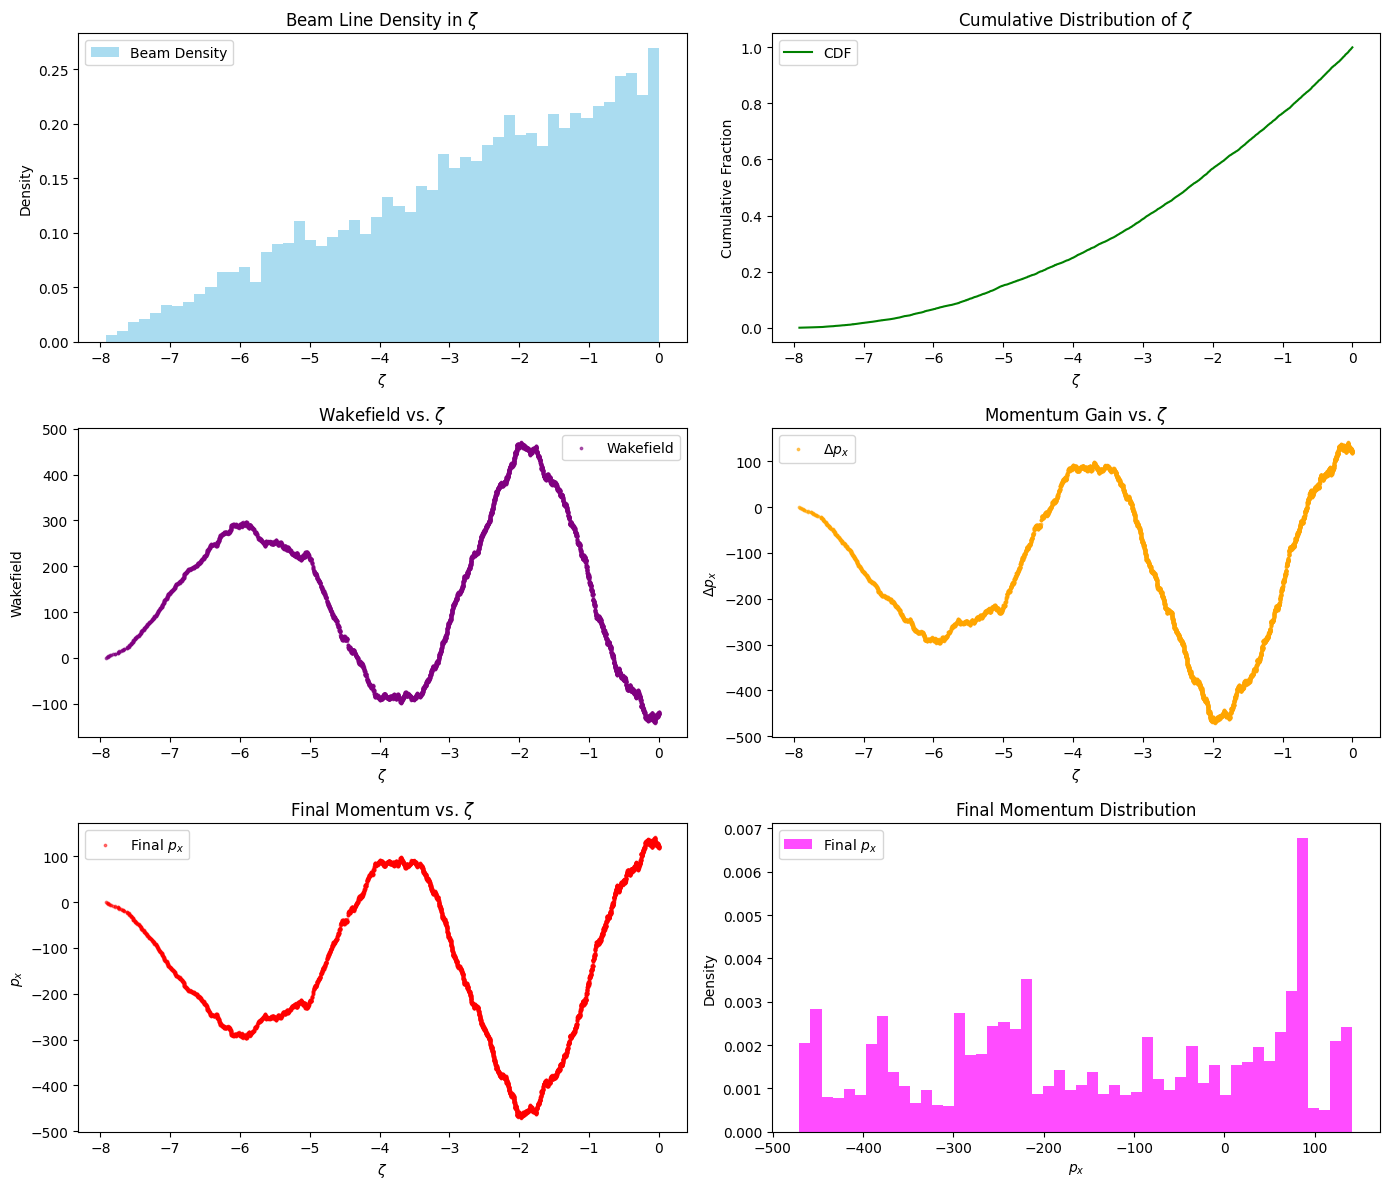

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# PARAMETERS
num_particles = 10000
zeta_min, zeta_max = -8.0, 0.0
W0 = 1.0
k_wake = 1.5
charge = 1.0
px_initial = 0.0

def sample_ramp_zeta(n, z_min, z_max, device):
    u = torch.rand(n, device=device)
    return z_min + (z_max - z_min) * torch.sqrt(u)

def wake_function(delta_zeta):
    wake_pos = W0 * torch.cos(k_wake * delta_zeta)
    wake_zero = torch.full_like(delta_zeta, W0 / 2)
    wake_neg = torch.zeros_like(delta_zeta)
    return torch.where(delta_zeta > 0, wake_pos,
                       torch.where(delta_zeta == 0, wake_zero, wake_neg))

def compute_total_wake(zeta):
    delta = zeta.unsqueeze(1) - zeta.unsqueeze(0)  # [N, N]
    wake_vals = wake_function(delta)
    return wake_vals.sum(dim=1)

if __name__ == '__main__':
    zeta = sample_ramp_zeta(num_particles, zeta_min, zeta_max, device)
    px0 = torch.full((num_particles,), px_initial, device=device)

    total_wake = compute_total_wake(zeta)
    px = px0 - charge * total_wake  # invert sign for electrons
    delta_px = px - px0

    zeta_eval = torch.linspace(zeta_min - 2, zeta_max + 2, steps=100, device=device)
    delta_eval = zeta_eval.unsqueeze(-1) - zeta.unsqueeze(-2)  # [100, N]
    summed_wake = wake_function(delta_eval).sum(dim=-1)

    zeta_np = zeta.cpu().numpy()
    total_wake_np = total_wake.cpu().numpy()
    delta_px_np = delta_px.cpu().numpy()
    px_np = px.cpu().numpy()
    zeta_eval_np = zeta_eval.cpu().numpy()
    summed_wake_np = summed_wake.cpu().numpy()

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()

    counts, bins, patches = ax1.hist(zeta_np, bins=50, density=True, alpha=0.6,
                                     color='skyblue', label='Charge Histogram')
    ax1.set_xlabel(r'$\zeta$')
    ax1.set_ylabel('Charge Density', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    p = ax2.plot(zeta_eval_np, summed_wake_np, '-', color='purple', label='Summed Wakefield')
    ax2.set_ylabel('Wakefield', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')

    lines = [patches[0], p[0]]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')

    plt.title('Charge Histogram and Summed Wakefield vs. $\zeta$')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(3, 2, figsize=(14, 12))

    axs[0, 0].hist(zeta_np, bins=50, density=True, alpha=0.7,
                   color='skyblue', label='Beam Density')
    axs[0, 0].set_title(r'Beam Line Density in $\zeta$')
    axs[0, 0].set_xlabel(r'$\zeta$')
    axs[0, 0].set_ylabel('Density')
    axs[0, 0].legend()

    axs[0, 1].plot(np.sort(zeta_np), np.linspace(0, 1, num_particles),
                   color='green', label='CDF')
    axs[0, 1].set_title(r'Cumulative Distribution of $\zeta$')
    axs[0, 1].set_xlabel(r'$\zeta$')
    axs[0, 1].set_ylabel('Cumulative Fraction')
    axs[0, 1].legend()

    axs[1, 0].scatter(zeta_np, total_wake_np, s=3, alpha=0.6,
                      color='purple', label='Wakefield')
    axs[1, 0].set_title(r'Wakefield vs. $\zeta$')
    axs[1, 0].set_xlabel(r'$\zeta$')
    axs[1, 0].set_ylabel('Wakefield')
    axs[1, 0].legend()

    axs[1, 1].scatter(zeta_np, delta_px_np, s=3, alpha=0.6,
                      color='orange', label=r'$\Delta p_x$')
    axs[1, 1].set_title(r'Momentum Gain vs. $\zeta$')
    axs[1, 1].set_xlabel(r'$\zeta$')
    axs[1, 1].set_ylabel(r'$\Delta p_x$')
    axs[1, 1].legend()

    axs[2, 0].scatter(zeta_np, px_np, s=3, alpha=0.5,
                      color='red', label='Final $p_x$')
    axs[2, 0].set_title(r'Final Momentum vs. $\zeta$')
    axs[2, 0].set_xlabel(r'$\zeta$')
    axs[2, 0].set_ylabel(r'$p_x$')
    axs[2, 0].legend()

    axs[2, 1].hist(px_np, bins=50, density=True, alpha=0.7,
                   color='magenta', label='Final $p_x$')
    axs[2, 1].set_title('Final Momentum Distribution')
    axs[2, 1].set_xlabel(r'$p_x$')
    axs[2, 1].set_ylabel('Density')
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()

Compute wake & kick time: 0.37 ms
Peak GPU memory used (wake & kick): 2392.09 MB
Jacobian computation time: 68.33 ms
Peak GPU memory used (Jacobian): 2774.20 MB


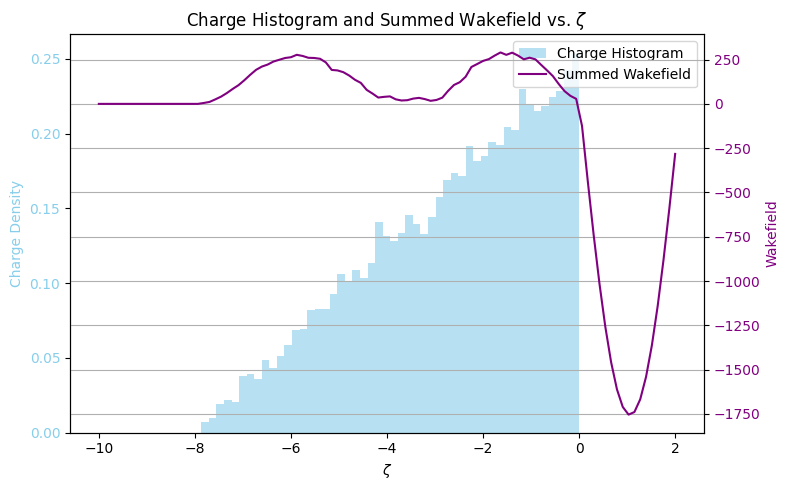

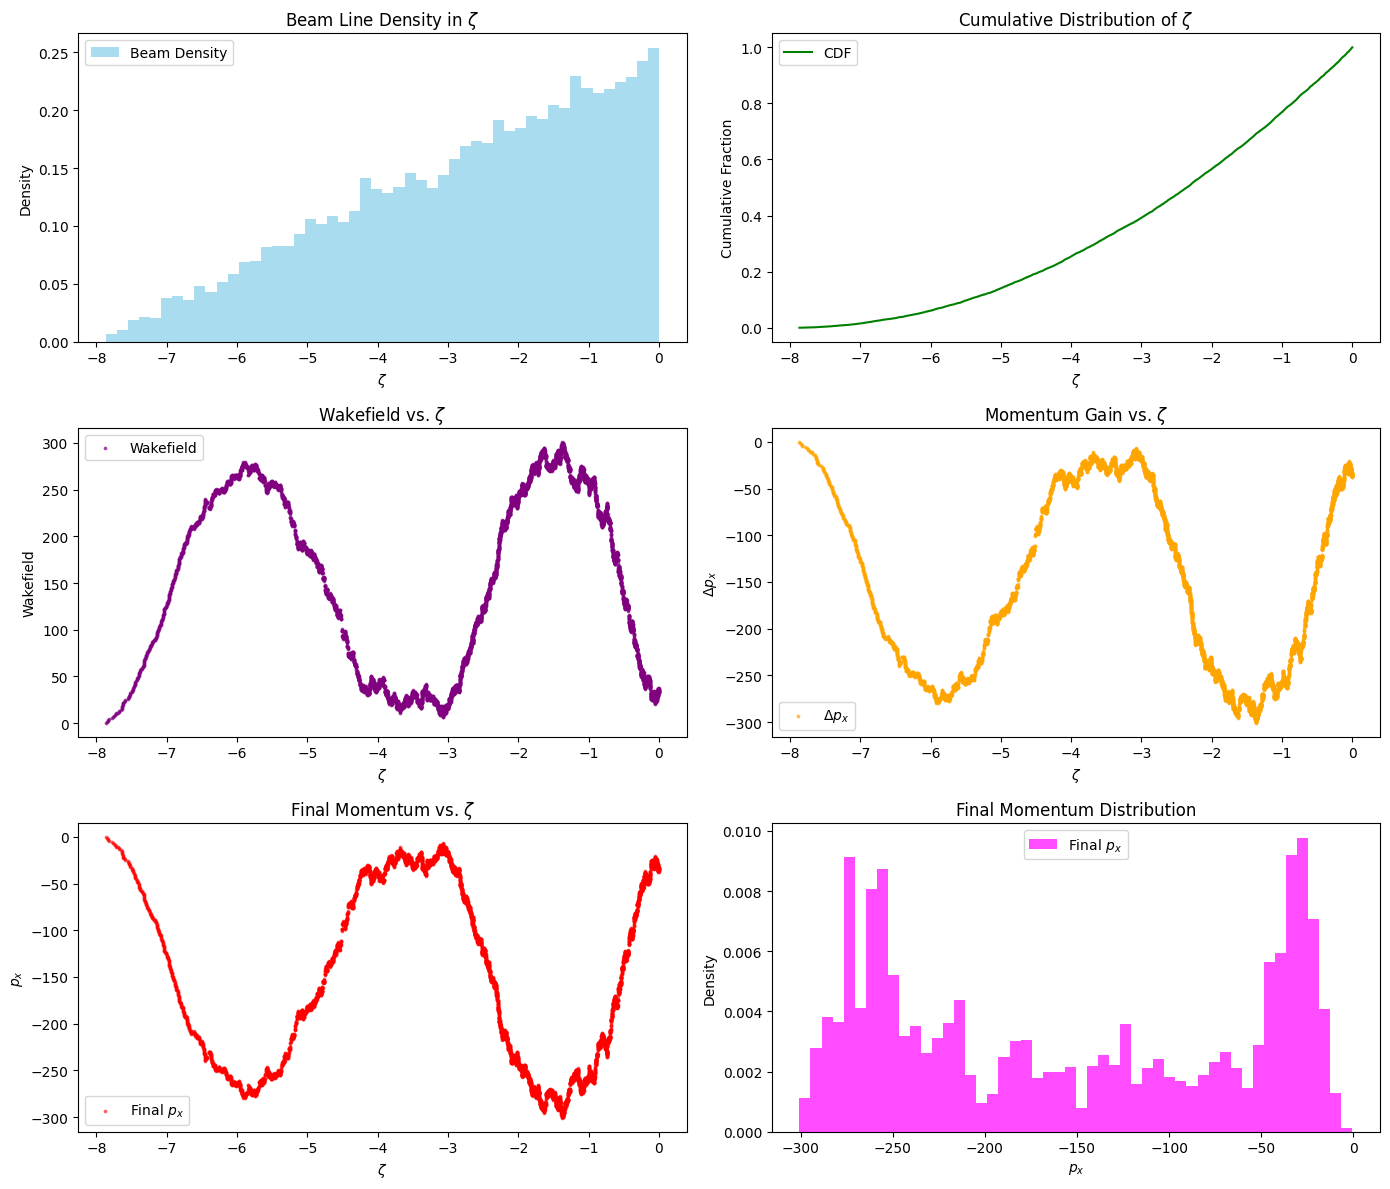

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# PARAMETERS
num_particles = 10000
zeta_min, zeta_max = -8.0, 0.0
W0 = 1.0
k_wake = 1.5  #wake oscillation parameter
charge = 1.0
px_initial = 0.0


def sample_ramp_zeta(n, z_min, z_max, device):
    u = torch.rand(n, device=device)
    return z_min + (z_max - z_min) * torch.sqrt(u)

def wake_function(delta_zeta):
    wake_pos = W0 * torch.cos(k_wake * delta_zeta)
    wake_zero = torch.full_like(delta_zeta, W0 / 2)
    wake_neg = torch.zeros_like(delta_zeta)
    return torch.where(delta_zeta > 0, wake_pos,
                       torch.where(delta_zeta == 0, wake_zero, wake_neg))

def compute_total_wake(zeta):
    delta = zeta.unsqueeze(1) - zeta.unsqueeze(0)  # [N, N]
    wake_vals = wake_function(delta)
    return wake_vals.sum(dim=1)

if __name__ == '__main__':
    zeta = sample_ramp_zeta(num_particles, zeta_min, zeta_max, device)
    px0 = torch.full((num_particles,), px_initial, device=device)

    import time
    if device == 'cuda':
        torch.cuda.reset_peak_memory_stats()
    start_time = time.perf_counter()
    total_wake = compute_total_wake(zeta)
    px = px0 - charge * total_wake  # invert sign for electrons
    delta_px = px - px0
    elapsed_ms = (time.perf_counter() - start_time) * 1000
    print(f"Compute wake & kick time: {elapsed_ms:.2f} ms")
    if device == 'cuda':
        peak_mem = torch.cuda.max_memory_allocated(device) / 1024**2
        print(f"Peak GPU memory used (wake & kick): {peak_mem:.2f} MB")

    if device == 'cuda':
        torch.cuda.reset_peak_memory_stats()
    start_jac = time.perf_counter()
    def px_i(locations):
        tw = compute_total_wake(locations)
        return px0[0] - charge * tw[0]
    jac = torch.autograd.functional.jacobian(px_i, zeta)
    elapsed_jac = (time.perf_counter() - start_jac) * 1000
    print(f"Jacobian computation time: {elapsed_jac:.2f} ms")
    if device == 'cuda':
        peak_jac = torch.cuda.max_memory_allocated(device) / 1024**2
        print(f"Peak GPU memory used (Jacobian): {peak_jac:.2f} MB")

    zeta_eval = torch.linspace(zeta_min - 2, zeta_max + 2, steps=100, device=device)
    delta_eval = zeta_eval.unsqueeze(-1) - zeta.unsqueeze(-2)  # [100, N]
    summed_wake = wake_function(delta_eval).sum(dim=-1)

    zeta_np = zeta.cpu().numpy()
    total_wake_np = total_wake.cpu().numpy()
    delta_px_np = delta_px.cpu().numpy()
    px_np = px.cpu().numpy()
    zeta_eval_np = zeta_eval.cpu().numpy()
    summed_wake_np = summed_wake.cpu().numpy()

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()

    counts, bins, patches = ax1.hist(zeta_np, bins=50, density=True, alpha=0.6,
                                     color='skyblue', label='Charge Histogram')
    ax1.set_xlabel(r'$\zeta$')
    ax1.set_ylabel('Charge Density', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    p = ax2.plot(zeta_eval_np, summed_wake_np, '-', color='purple', label='Summed Wakefield')
    ax2.set_ylabel('Wakefield', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')

    lines = [patches[0], p[0]]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')

    plt.title('Charge Histogram and Summed Wakefield vs. $\zeta$')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(3, 2, figsize=(14, 12))

    axs[0, 0].hist(zeta_np, bins=50, density=True, alpha=0.7,
                   color='skyblue', label='Beam Density')
    axs[0, 0].set_title(r'Beam Line Density in $\zeta$')
    axs[0, 0].set_xlabel(r'$\zeta$')
    axs[0, 0].set_ylabel('Density')
    axs[0, 0].legend()

    axs[0, 1].plot(np.sort(zeta_np), np.linspace(0, 1, num_particles),
                   color='green', label='CDF')
    axs[0, 1].set_title(r'Cumulative Distribution of $\zeta$')
    axs[0, 1].set_xlabel(r'$\zeta$')
    axs[0, 1].set_ylabel('Cumulative Fraction')
    axs[0, 1].legend()

    axs[1, 0].scatter(zeta_np, total_wake_np, s=3, alpha=0.6,
                      color='purple', label='Wakefield')
    axs[1, 0].set_title(r'Wakefield vs. $\zeta$')
    axs[1, 0].set_xlabel(r'$\zeta$')
    axs[1, 0].set_ylabel('Wakefield')
    axs[1, 0].legend()

    axs[1, 1].scatter(zeta_np, delta_px_np, s=3, alpha=0.6,
                      color='orange', label=r'$\Delta p_x$')
    axs[1, 1].set_title(r'Momentum Gain vs. $\zeta$')
    axs[1, 1].set_xlabel(r'$\zeta$')
    axs[1, 1].set_ylabel(r'$\Delta p_x$')
    axs[1, 1].legend()

    axs[2, 0].scatter(zeta_np, px_np, s=3, alpha=0.5,
                      color='red', label='Final $p_x$')
    axs[2, 0].set_title(r'Final Momentum vs. $\zeta$')
    axs[2, 0].set_xlabel(r'$\zeta$')
    axs[2, 0].set_ylabel(r'$p_x$')
    axs[2, 0].legend()

    axs[2, 1].hist(px_np, bins=50, density=True, alpha=0.7,
                   color='magenta', label='Final $p_x$')
    axs[2, 1].set_title('Final Momentum Distribution')
    axs[2, 1].set_xlabel(r'$p_x$')
    axs[2, 1].set_ylabel('Density')
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()

metrics

In [6]:
_ = compute_total_wake(sample_ramp_zeta(100, zeta_min, zeta_max, device))
if device == 'cuda':
    torch.cuda.synchronize()
    torch.cuda.reset_peak_memory_stats()


100 particles | Wake: 0.42 ms, 4.33 MB | Jacobian: 1.32 ms, 4.38 MB
807 particles | Wake: 0.25 ms, 22.12 MB | Jacobian: 1.19 ms, 25.18 MB
1514 particles | Wake: 0.23 ms, 70.57 MB | Jacobian: 1.41 ms, 78.70 MB
2221 particles | Wake: 0.36 ms, 151.45 MB | Jacobian: 1.24 ms, 164.04 MB
2928 particles | Wake: 0.33 ms, 264.73 MB | Jacobian: 1.17 ms, 282.09 MB
3635 particles | Wake: 0.23 ms, 410.44 MB | Jacobian: 1.17 ms, 432.56 MB
4342 particles | Wake: 0.22 ms, 588.55 MB | Jacobian: 0.99 ms, 615.44 MB
5050 particles | Wake: 0.32 ms, 799.94 MB | Jacobian: 1.27 ms, 831.06 MB
5757 particles | Wake: 0.32 ms, 1042.40 MB | Jacobian: 1.20 ms, 1078.82 MB
6464 particles | Wake: 0.23 ms, 1317.81 MB | Jacobian: 1.19 ms, 1358.99 MB
7171 particles | Wake: 0.31 ms, 1625.63 MB | Jacobian: 1.49 ms, 1671.58 MB
7878 particles | Wake: 0.51 ms, 1965.87 MB | Jacobian: 1.03 ms, 2016.58 MB
8585 particles | Wake: 0.47 ms, 2339.37 MB | Jacobian: 0.87 ms, 2394.85 MB
9292 particles | Wake: 0.48 ms, 2744.23 MB | Jacobi

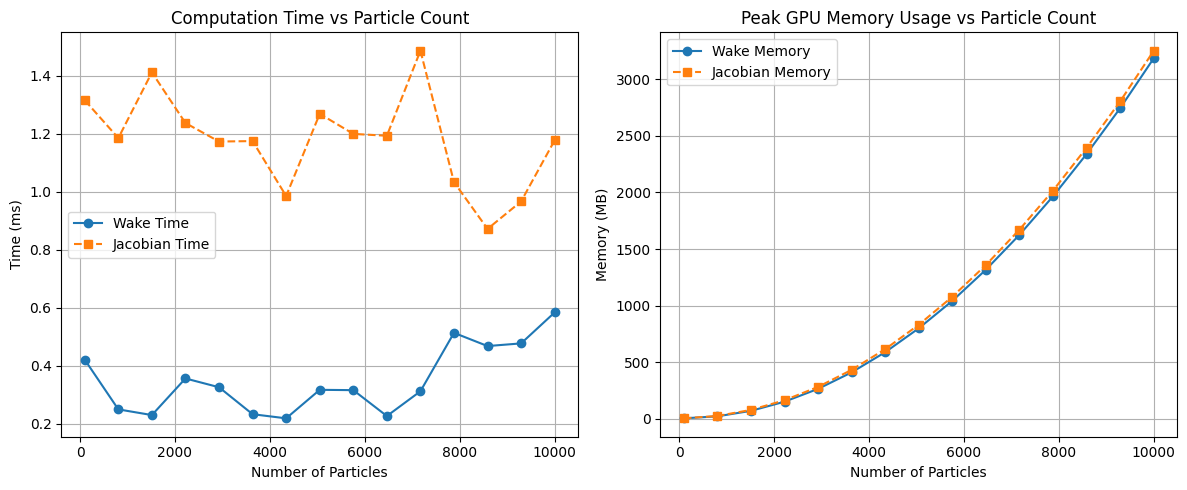

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

device = 'cuda' if torch.cuda.is_available() else 'cpu'


# PARAMETERS
zeta_min, zeta_max = -8.0, 0.0
W0 = 1.0
k_wake = 1.5
charge = 1.0
px_initial = 0.0

particle_counts = np.linspace(100, 10000, num=15, dtype=int)
wake_times_ms = []
jacobian_times_ms = []
wake_memories_mb = []
jacobian_memories_mb = []

def sample_ramp_zeta(n, z_min, z_max, device):
    u = torch.rand(n, device=device)
    return z_min + (z_max - z_min) * torch.sqrt(u)

def wake_function(delta_zeta):
    wake_pos = W0 * torch.cos(k_wake * delta_zeta)
    wake_zero = torch.full_like(delta_zeta, W0 / 2)
    wake_neg = torch.zeros_like(delta_zeta)
    return torch.where(delta_zeta > 0, wake_pos,
                       torch.where(delta_zeta == 0, wake_zero, wake_neg))

def compute_total_wake(zeta):
    delta = zeta.unsqueeze(1) - zeta.unsqueeze(0)
    wake_vals = wake_function(delta)
    return wake_vals.sum(dim=1)

for num_particles in particle_counts:
    if device == 'cuda':
        torch.cuda.reset_peak_memory_stats()

    zeta = sample_ramp_zeta(num_particles, zeta_min, zeta_max, device)
    zeta.requires_grad_(True)  # required for Jacobian
    px0 = torch.full((num_particles,), px_initial, device=device)

    start = time.perf_counter()
    total_wake = compute_total_wake(zeta)
    px = px0 - charge * total_wake
    elapsed_wake = (time.perf_counter() - start) * 1000  # ms
    wake_times_ms.append(elapsed_wake)

    if device == 'cuda':
        wake_mem = torch.cuda.max_memory_allocated(device) / 1024**2
    else:
        wake_mem = 0.0
    wake_memories_mb.append(wake_mem)

    if device == 'cuda':
        torch.cuda.reset_peak_memory_stats()

    def px_i(locations):
        tw = compute_total_wake(locations)
        return px0[0] - charge * tw[0]

    start_jac = time.perf_counter()
    jac = torch.autograd.functional.jacobian(px_i, zeta)
    elapsed_jac = (time.perf_counter() - start_jac) * 1000  # ms
    jacobian_times_ms.append(elapsed_jac)

    if device == 'cuda':
        jac_mem = torch.cuda.max_memory_allocated(device) / 1024**2
    else:
        jac_mem = 0.0
    jacobian_memories_mb.append(jac_mem)

    print(f"{num_particles} particles | Wake: {elapsed_wake:.2f} ms, {wake_mem:.2f} MB | "
          f"Jacobian: {elapsed_jac:.2f} ms, {jac_mem:.2f} MB")

# Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(particle_counts, wake_times_ms, 'o-', label='Wake Time')
plt.plot(particle_counts, jacobian_times_ms, 's--', label='Jacobian Time')
plt.xlabel('Number of Particles')
plt.ylabel('Time (ms)')
plt.title('Computation Time vs Particle Count')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(particle_counts, wake_memories_mb, 'o-', label='Wake Memory')
plt.plot(particle_counts, jacobian_memories_mb, 's--', label='Jacobian Memory')
plt.xlabel('Number of Particles')
plt.ylabel('Memory (MB)')
plt.title('Peak GPU Memory Usage vs Particle Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


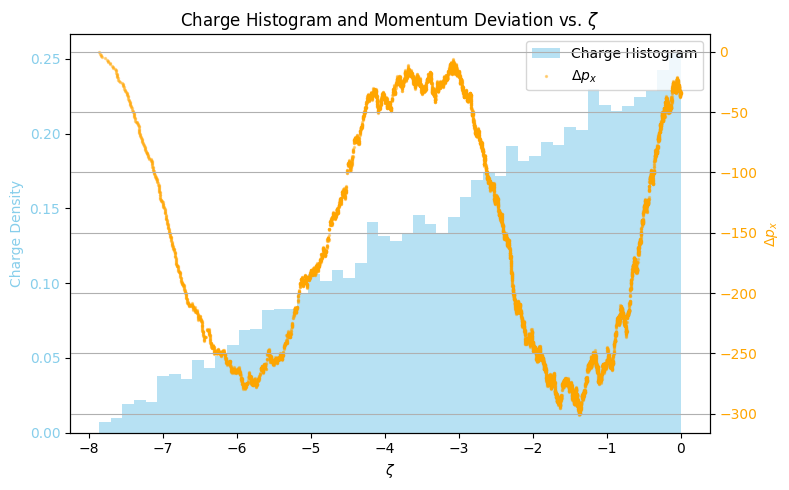

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

#Charge histogram on left
counts, bins, patches = ax1.hist(
    zeta_np, bins=50, density=True, alpha=0.6,
    color='skyblue', label='Charge Histogram'
)
ax1.set_xlabel(r'$\zeta$')
ax1.set_ylabel('Charge Density', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

#Momentum deviation on right
p2 = ax2.scatter(
    zeta_np, delta_px_np, s=2, alpha=0.4,
    color='orange', label=r'$\Delta p_x$'
)
ax2.set_ylabel(r'$\Delta p_x$', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines = [patches[0], p2]
labels = [ln.get_label() for ln in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('Charge Histogram and Momentum Deviation vs. $\zeta$')
plt.grid(True)
plt.tight_layout()
plt.show()
